In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso, Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [2]:
df=pd.read_csv('/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv')

In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [6]:
df['Garage'].value_counts(normalize=True)*100


Garage
No     51.9
Yes    48.1
Name: proportion, dtype: float64

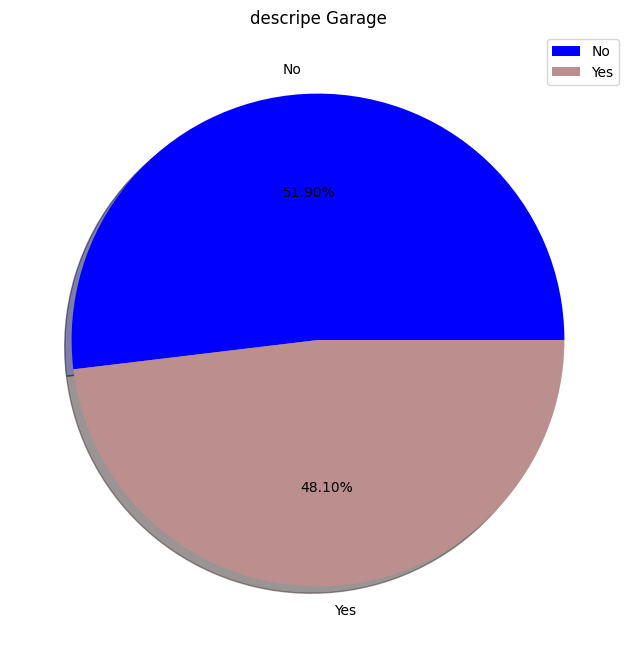

In [7]:
plt.figure(figsize=(10,8 ))
plt.pie(df['Garage'].value_counts().values,
        labels=df['Garage'].value_counts().index,
        colors=['Blue','rosybrown'],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('descripe Garage')
plt.legend()
plt.show()

In [8]:
df.isnull().sum()


Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [9]:
df['Area'].value_counts()

Area
4219    5
1752    4
1516    4
4646    4
1743    4
       ..
3948    1
4312    1
2862    1
2475    1
4062    1
Name: count, Length: 1622, dtype: int64

In [10]:
df.describe()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [11]:
df["Location"].value_counts()


Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

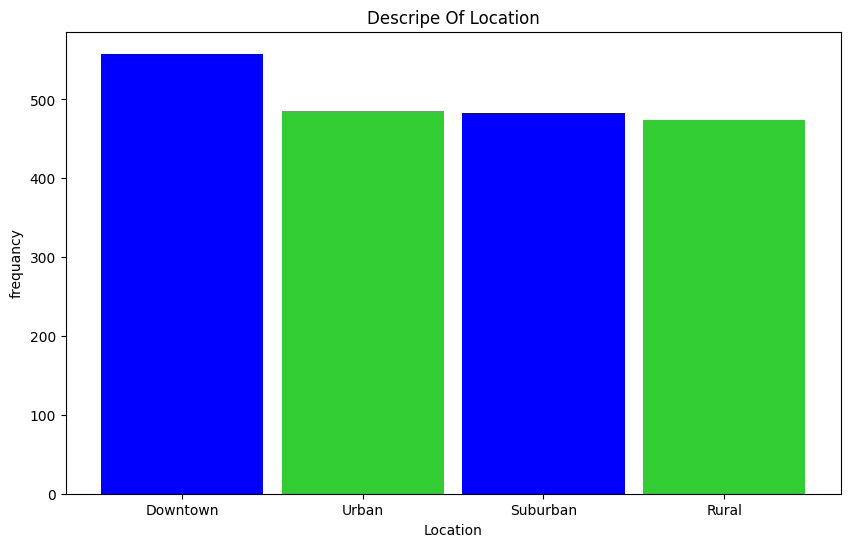

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df['Location'].value_counts().index , df['Location'].value_counts().values , color=['Blue','Limegreen'] ,width=0.9,alpha=1)
plt.xlabel('Location')
plt.ylabel('frequancy')
plt.title('Descripe Of Location')
plt.show()

In [13]:
df["Condition"].value_counts()


Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

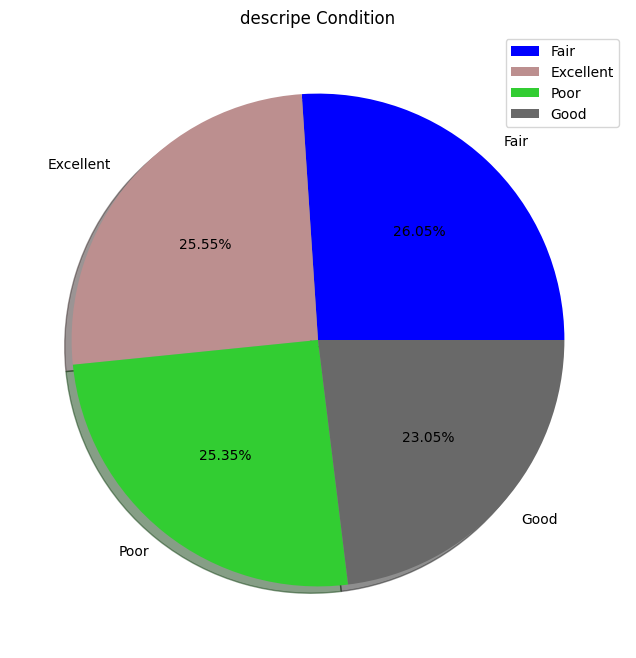

In [14]:
plt.figure(figsize=(10,8 ))
plt.pie(df['Condition'].value_counts().values,
        labels=df['Condition'].value_counts().index,
        colors=['Blue','rosybrown','Limegreen','dimgray'],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('descripe Condition')
plt.legend()
plt.show()

In [15]:
accepted_conditions = ['Excellent', 'Good']
df['Accepted'] = df['Condition'].isin(accepted_conditions).astype(int)


In [16]:
grouped = df.groupby('Location').agg(Total=('Location', 'count'),Accepted=('Accepted','sum'))

In [17]:
grouped['Acceptance_Rate'] = grouped['Accepted'] / grouped['Total']

In [18]:
result = grouped.sort_values(by='Acceptance_Rate', ascending=False)

In [19]:
print(result)

          Total  Accepted  Acceptance_Rate
Location                                  
Downtown    558       289         0.517921
Suburban    483       233         0.482402
Urban       485       230         0.474227
Rural       474       220         0.464135


<Axes: xlabel='Price'>

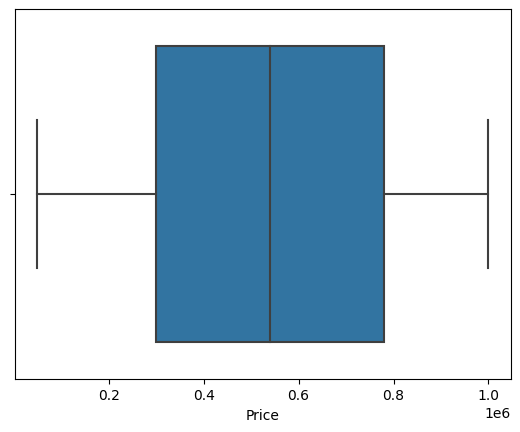

In [20]:
sns.boxplot(x=df['Price'])

In [21]:
df = df[df['Price'] < df['Price'].quantile(0.95)]

In [22]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Accepted
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,1
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3592,2,2,3,1938,Downtown,Good,No,266746,1
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,1


In [23]:
df["Bedrooms"].value_counts()


Bedrooms
1    396
3    388
5    385
4    383
2    348
Name: count, dtype: int64

In [24]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Accepted
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,1
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3592,2,2,3,1938,Downtown,Good,No,266746,1
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0


In [25]:
areas=df.groupby(['Area'])['YearBuilt'].value_counts()
areas

Area  YearBuilt
501   1905         1
      1955         1
502   1909         1
503   2012         1
504   1925         1
                  ..
4995  1925         1
4996  1943         1
      2005         1
4997  1918         1
4999  1967         1
Name: count, Length: 1897, dtype: int64

In [26]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Accepted
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,1
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3592,2,2,3,1938,Downtown,Good,No,266746,1
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,1


In [27]:
x=df.drop(columns=['Price'])
y=df['Price']

In [28]:
x

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Accepted
0,1360,5,4,3,1970,Downtown,Excellent,No,1
1,4272,5,4,3,1958,Downtown,Excellent,No,1
2,3592,2,2,3,1938,Downtown,Good,No,1
3,966,4,2,2,1902,Suburban,Fair,Yes,0
4,4926,1,4,2,1975,Downtown,Fair,Yes,0
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,0
1997,1062,5,1,2,1903,Rural,Poor,No,0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,1


In [29]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 1900, dtype: int64

In [30]:
encoder = LabelEncoder()
x['Condition'] = encoder.fit_transform(df['Condition'])
x['Location'] = encoder.fit_transform(df['Location'])
x['Garage'] = encoder.fit_transform(df['Garage'])


In [31]:
x

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Accepted
0,1360,5,4,3,1970,0,0,0,1
1,4272,5,4,3,1958,0,0,0,1
2,3592,2,2,3,1938,0,2,0,1
3,966,4,2,2,1902,2,1,1,0
4,4926,1,4,2,1975,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0,0
1996,3046,5,2,1,2019,2,3,1,0
1997,1062,5,1,2,1903,1,3,0,0
1998,4062,3,1,2,1936,3,0,1,1


In [32]:
scaler = MinMaxScaler()
x['Area'] = scaler.fit_transform(x[['Area']])

In [33]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,train_size=0.8, shuffle=True, random_state=True)

In [34]:
x_train


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Accepted
1987,0.686305,4,1,3,1929,3,3,0,0
1087,0.865496,4,3,2,2004,3,0,0,1
1816,0.826590,1,1,1,2001,0,0,1,1
905,0.267675,3,1,2,1996,0,2,1,1
1487,0.460205,3,3,3,1962,3,1,1,0
...,...,...,...,...,...,...,...,...,...
948,0.422410,4,1,3,1933,3,3,0,0
1886,0.120276,4,3,2,1923,0,1,0,0
1152,0.916630,5,4,1,1954,0,2,0,1
249,0.276123,1,3,3,1923,2,2,1,1


In [35]:
y_train

1987     59765
1087    325871
1816    352468
905     650243
1487    493884
         ...  
948     297145
1886    264776
1152    487538
249     178824
1111     56457
Name: Price, Length: 1520, dtype: int64

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)


In [38]:
y_pred


array([541541.44410751, 494360.36374045, 520875.43565838, 509000.25633497,
       513853.10382311, 486494.97134037, 490216.5320822 , 529367.22078472,
       497946.8424261 , 505346.30362377, 522491.22542736, 531605.45341793,
       516671.65101242, 517346.69978788, 524138.55884397, 507962.95923957,
       532658.60901924, 483296.09542165, 514252.36101631, 541150.51423012,
       527566.10123562, 519346.22910299, 491375.9793154 , 501793.42354959,
       527032.16953769, 499997.27178702, 520570.0921629 , 503514.97324384,
       515079.0759352 , 508975.79328987, 524607.09580367, 489607.84214738,
       486237.71457014, 541315.29447046, 517399.73492712, 528456.51600435,
       497012.36275557, 504889.54063356, 514500.42443782, 498625.99842476,
       487831.48477808, 491883.18920918, 504070.03995204, 530455.95181352,
       502853.19203593, 523637.6203734 , 519750.39701125, 515922.23928418,
       498840.09990927, 502386.00510105, 536125.79612192, 541114.08118933,
       510887.1681977 , 5

In [39]:
print(mean_squared_error(y_test, y_pred))


70927001934.13933


In [40]:
print(mean_absolute_error(y_test, y_pred))


229796.05658581122


In [41]:
sgd = SGDRegressor()

sgd.fit(x_train, y_train)


SGDRegressor()

In [42]:
y_pred = sgd.predict(x_test)


In [43]:
print(mean_absolute_error(y_test, y_pred))


1099216723816562.5


In [44]:
print(mean_squared_error(y_test, y_pred))


1.2086600998839846e+30


In [45]:
ridge = Ridge()

ridge.fit(x_train, y_train)

Ridge()

In [46]:
y_pred = ridge.predict(x_test)


In [47]:
print(mean_absolute_error(y_test, y_pred))


229796.04159628553


In [48]:
print(y_test.mean())


517526.9815789474


In [49]:
m_1 = mean_absolute_error(y_test, y_pred)
m1_percent = m_1 / y_test.mean()
print(f"Mean Absolute Error : {m1_percent:.2%}")

Mean Absolute Error : 44.40%


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 229796.05246821203
RMSE: 266320.6130165384
R²: -0.0015689828583447252


<Axes: >

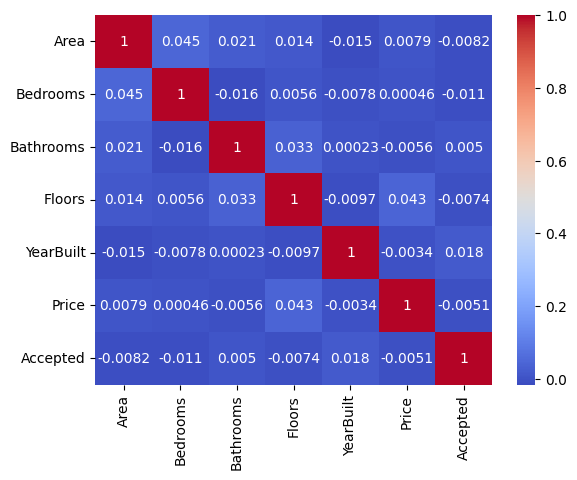

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest MAE: 244057.47936842105
Random Forest RMSE: 285295.12972421537
Random Forest R²: -0.1493704272082328


In [54]:
df.columns


Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price', 'Accepted'],
      dtype='object')

In [55]:
df = pd.get_dummies(df, columns=['Location', 'Condition'], drop_first=True)


In [56]:
print(df.isnull().sum())
print(df.describe())


Area                 0
Bedrooms             0
Bathrooms            0
Floors               0
YearBuilt            0
Garage               0
Price                0
Accepted             0
Location_Rural       0
Location_Suburban    0
Location_Urban       0
Condition_Fair       0
Condition_Good       0
Condition_Poor       0
dtype: int64
              Area     Bedrooms    Bathrooms       Floors    YearBuilt  \
count  1900.000000  1900.000000  1900.000000  1900.000000  1900.000000   
mean   2790.599474     3.006842     2.560000     1.984737  1961.264737   
std    1296.106331     1.424770     1.108196     0.807599    35.926259   
min     501.000000     1.000000     1.000000     1.000000  1900.000000   
25%    1665.750000     2.000000     2.000000     1.000000  1930.000000   
50%    2829.500000     3.000000     3.000000     2.000000  1961.000000   
75%    3894.750000     4.000000     4.000000     3.000000  1993.000000   
max    4999.000000     5.000000     4.000000     3.000000  2023.000000   

In [57]:
df = df[df['Area'] > 0]
df = df[df['Bedrooms'] > 0]


In [58]:
X = df.drop(['Price', 'Accepted'], axis=1)
y = df['Price']


In [59]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x, y, cv=5, scoring='neg_mean_absolute_error')
print("Average MAE:", -scores.mean())


Average MAE: 233178.14663192825


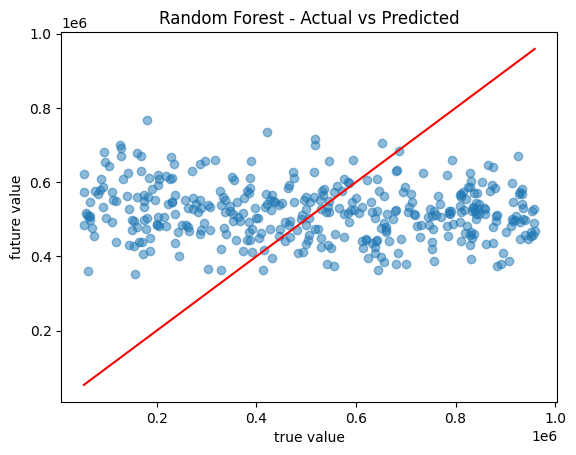

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("true value")
plt.ylabel("future value")
plt.title("Random Forest - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [62]:
df.duplicated().sum()


0